<a href="https://colab.research.google.com/github/anushka012/Random_Data_Generation/blob/main/Random_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import re

### Helper Functions

In [ ]:
def clean_text(text):
    return text.strip().lower()

In [ ]:
def clean_loss_reasons(text):
        if type(text) == str:
            text = re.sub(' ,', ',', text) #Replace ' ,' with ','
            text = re.sub(', ', ',', text) #Replace ',' with ', '
            text = clean_text(text)
            text = re.sub(' +', ' ', text) #Remove extra spaces between words
            
            text = set(text.split(','))    #Split by comma and convert into set of reasons
            text = ', '.join(text)         #Join by comma + one Space
            if text == '-' or text == '_':
                text = np.nan
        return text

In [ ]:
def loc_Dist(text):
    
    if type(text) == str:
        text = clean_text(text)
        text = re.sub(' +', ' ', text)
        text = re.sub(' ,', ',', text) #Replace ' ,' with ','
        text = re.sub(',', ', ', text) #Replace ',' with ', '
        
    if text == '-' or text == '_':
        text = np.nan

    return text

In [ ]:
def Farm_Size_Hectare(text):
    
    if type(text) == str:
        text = clean_text(text)
        text = re.sub(' ,', ',', text) #Replace ' ,' with ','
        text = re.sub(',', ', ', text) #Replace ',' with ', '
        
    if text == '-' or text == '_':
        text = np.nan

    if text == '.0.16':
            text = 0.16
    
    return text

In [ ]:
def clean_Main_Crop_Monsoon(text):
    text = clean_loss_reasons(text)
    if text == 'sugarcne' or text == 'sugacane':
        text = 'sugarcane'
        
    return text   

In [ ]:
saved_file_path = "D:\Gaia Bharat LLP\Data\Farmers Interviews 2021_Cleaned_Viraj.xlsx"

df = pd.read_excel(saved_file_path, index_col = 'Unnamed: 0')
df

,Location,District,Age,Farm_Size,Farm_Size_Hectare,Tubewell_Size_Haudi,Pump_Details,Bore_Dpt,Bore_Dpt_Cng_Prd,Annual_Water_Need,...,Loss_Excess_Water,Loss_Fire_By_Electricity_In_Farm,Loss_Drought,Loss_Weather,Loss_Electricity,Loss_Pests,Loss_Fertilizer,Dummy_Diesel_Petrol,Dummy_Water_Probs_Money,Region
1,"shamli, melhandi",shamli,NaN,20.0,1.800,NaN,4hp,150feet+,NaN,No Idea,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,5000.0,west
2,"ghaziabad, muradnagar",ghaziabad,NaN,52.0,4.330,NaN,NaN,NaN,NaN,No Idea,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-999999.0,10000.0,west
3,"deoria, pakari bujurg",deoria,NaN,2.0,0.166,NaN,NaN,180feet,NaN,No Idea,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,5000.0,east
4,"deoria, bhatni",deoria,NaN,4.0,0.330,NaN,NaN,180feet,NaN,No Idea,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,5000.0,east
5,"deoria, pakari bujurg",deoria,NaN,20.0,1.660,NaN,NaN,180feet,NaN,No Idea,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,5000.0,east
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Model Experimentations

In [ ]:
df.iloc[:, 0] = df.iloc[:, 0].apply(loc_Dist)
df.iloc[:, 0].value_counts()

deoria,  pakari bujurg      9
deoria,  hetimpur           8
chittora,  muradnagar       4
baraut,  jonmana            3
meerut,  bana               2
                           ..
sarna,  ghaziabad           1
badhara deoria              1
ballia,  up                 1
chittora,  ghaziabad        1
karanpur chak,  pilibhit    1
Name: Location, Length: 61, dtype: int64

In [ ]:
df.iloc[:,4] = df.iloc[:,4].apply(Farm_Size_Hectare)
df['Farm_Size_Hectare'] = pd.to_numeric(df['Farm_Size_Hectare'])
df.iloc[:,4].value_counts()

0.410     11
1.660      7
0.330      7
0.830      5
1.000      5
4.160      5
0.250      4
5.000      3
0.160      3
1.250      3
0.166      3
1.410      3
0.910      2
8.330      2
6.660      2
4.000      2
2.910      2
4.166      1
2.500      1
2.080      1
1.900      1
1.830      1
8.750      1
3.160      1
2.250      1
8.600      1
0.120      1
1.670      1
4.330      1
1.600      1
1.800      1
0.750      1
3.580      1
1.120      1
1.330      1
3.910      1
12.500     1
7.500      1
0.500      1
2.000      1
25.000     1
Name: Farm_Size_Hectare, dtype: int64

<AxesSubplot:xlabel='Farm_Size_Hectare'>

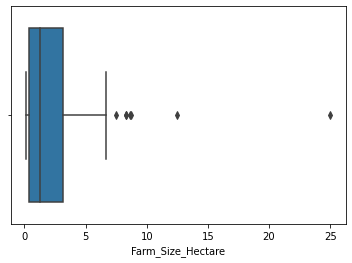

In [ ]:
sns.boxplot(df['Farm_Size_Hectare'])

In [ ]:
df.iloc[:, 1] = df.iloc[:, 1].apply(loc_Dist)
df.iloc[:, 1].value_counts()

deoria           21
ghaziabad        17
shamli           16
sonebhadra        9
baghpat           4
varanasi          3
meerut            3
muzaffarnagar     2
gopalganj         2
mirzapur          2
jaunpur           1
bhagpat           1
hapur             1
ballia            1
almora            1
muzaffarpur       1
pilibhit          1
bulandsher        1
agra              1
kanpur            1
maharajganj       1
deori             1
basti             1
siwan             1
Name: District, dtype: int64

In [ ]:
loc_mapping = {'deoria': 'east',
               'ghaziabad': 'west',
               'shamli': 'west',
               'sonebhadra': 'east',
               'baghpat': 'west', 
               'varanasi': 'east',
               'meerut': 'west',
               'mirzapur': 'east',
               'gopalganj': 'west-bihar',
               'muzaffarnagar': 'west',
               'ballia': 'east',
               'pilibhit': 'west',
               'agra': 'west',
               'maharajganj': 'east',
               'kanpur': 'west',  #seems central
               'muzaffarpur': 'west-bihar', #seems central
               'deori': 'east',
               'siwar': 'west-bihar',
               'basti': 'east',
               'almora': 'west', #almora is an erroneous entry for the true amoroha
               'bulandsher': 'west',
               'hapur': 'west',
               'jaunpur': 'east',
               'bhagpat': 'west'}

In [ ]:
df['Region'] = df['District'].map(loc_mapping)
df['Region'].value_counts()

west          49
east          40
west-bihar     3
Name: Region, dtype: int64

In [ ]:
df.loc[:,'Main_Crop_Monsoon'] = df.loc[:,'Main_Crop_Monsoon'].apply(clean_Main_Crop_Monsoon)
df.loc[:,'Main_Crop_Monsoon'].value_counts()

sugarcane            54
paddy                22
paddy, sugarcane      7
paddy, vegetables     3
bottle gourd          1
lemon                 1
flower                1
vegetables            1
maize                 1
barsheem              1
Name: Main_Crop_Monsoon, dtype: int64

In [ ]:
df.loc[:,'Summer_Crops'].apply(clean_loss_reasons).value_counts()

sugarcane            61
vegetables           19
nothing               2
                      1
paddy, vegetables     1
barley                1
fodder                1
paddy                 1
Name: Summer_Crops, dtype: int64

In [ ]:
df.loc[:,'Winter_Crops'].apply(clean_loss_reasons).value_counts()

wheat                      79
wheat, vegetables           2
potato                      2
whaet, other rabi crop      2
wheat, other rabi crop      2
wheat, potato               2
potatoes, wheat, onions     1
vegetables                  1
wheat, pulses               1
Name: Winter_Crops, dtype: int64

In [ ]:
df

,Location,District,Age,Farm_Size,Farm_Size_Hectare,Tubewell_Size_Haudi,Pump_Details,Bore_Dpt,Bore_Dpt_Cng_Prd,Annual_Water_Need,...,Loss_Excess_Water,Loss_Fire_By_Electricity_In_Farm,Loss_Drought,Loss_Weather,Loss_Electricity,Loss_Pests,Loss_Fertilizer,Dummy_Diesel_Petrol,Dummy_Water_Probs_Money,Region
1,"shamli, melhandi",shamli,NaN,20.0,1.800,NaN,4hp,150feet+,NaN,No Idea,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,5000.0,west
2,"ghaziabad, muradnagar",ghaziabad,NaN,52.0,4.330,NaN,NaN,NaN,NaN,No Idea,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-999999.0,10000.0,west
3,"deoria, pakari bujurg",deoria,NaN,2.0,0.166,NaN,NaN,180feet,NaN,No Idea,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,5000.0,east
4,"deoria, bhatni",deoria,NaN,4.0,0.330,NaN,NaN,180feet,NaN,No Idea,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,5000.0,east
5,"deoria, pakari bujurg",deoria,NaN,20.0,1.660,NaN,NaN,180feet,NaN,No Idea,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,5000.0,east
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cat_cols = df.select_dtypes(include = ['object']).columns
num_cols = df.select_dtypes(exclude = ['object']).columns

cat_cols, num_cols

(Index(['Location', 'District', 'Age', 'Tubewell_Size_Haudi', 'Pump_Details',
        'Bore_Dpt', 'Bore_Dpt_Cng_Prd', 'Annual_Water_Need',
        'Main_Crop_Monsoon', 'Ms_Frm_Strt_Fnsh', 'Ms_Crop_Rotation',
        'Winter_Crops', 'Winter_Water_Source', 'Winter_Water_Usage',
        'Winter_Farming_Duration', 'Summer_Crops', 'Summer_Water_Source',
        'Summer_Water_Usage', 'Crop_Rotation', 'Prfrd_Crop', 'Mthd_Irrigation',
        'Drip_Sprinkler_System', 'Improve_Soil_health', 'Sewage_Water',
        'Rainwater_Storage', 'Extra_Rainwater', 'Spent_Diesel_Petrol',
        'Grnd_Can', 'Yrs_Borewell', 'Grnd_Runout_Action', 'Can_Access',
        'Can_Hard', 'Loss_Reasons', 'Loss_Season', 'Flood_Protection',
        'Govt_Scheme_Aware', 'Water_Probs_Sol', 'Water_Probs_Money',
        'Middle_Man', 'Govt_Sales_Probs', 'Other_Info', 'Suprise_Info',
        'Study_Interest', 'Region'],
       dtype='object'),
 Index(['Farm_Size', 'Farm_Size_Hectare', 'Loss_Improper_Water_Irrigation',
     

In [ ]:
def rand_col_prob(data = df,
                  size = 1000,
                  column = None):
    arr = data[column].value_counts(normalize = True)
    
    values = arr.index.to_list()
    probs = arr.values
    
    return np.random.choice(a = values,
                            size = size,
                            p = probs)

In [ ]:
def rand_col_no_prob(data = df,
                     size = 1000,
                     column = None):
    
    return np.random.choice(a = data[column],
                            size = size)

In [ ]:
def rand_dataset_cat(cat_cols = cat_cols):
    data = pd.DataFrame()
    for column in cat_cols:
        rand_col = pd.DataFrame({column: rand_col_prob(data = df,
                                                       size = 10000,
                                                       column = column)})
        data = pd.concat([data,rand_col], 
                         axis = 1)

    return data

In [ ]:
def rand_dataset_num(num_cols = num_cols):
    data = pd.DataFrame()
    for column in num_cols:
        rand_col = pd.DataFrame({column: rand_col_no_prob(data = df,
                                                          size = 10000,
                                                          column = column)})
        data = pd.concat([data,rand_col], 
                         axis = 1)

    return data

In [ ]:
# Random Categorical Dataset
temp_cat = rand_dataset_cat(cat_cols = cat_cols)
temp_cat

,Location,District,Age,Tubewell_Size_Haudi,Pump_Details,Bore_Dpt,Bore_Dpt_Cng_Prd,Annual_Water_Need,Main_Crop_Monsoon,Ms_Frm_Strt_Fnsh,...,Flood_Protection,Govt_Scheme_Aware,Water_Probs_Sol,Water_Probs_Money,Middle_Man,Govt_Sales_Probs,Other_Info,Suprise_Info,Study_Interest,Region
0,"kharad, shamli",deoria,60 year,5x4 feet,use motor,200 feet,No,No Idea,sugarcane,June-sept,...,no,no,yes,0,mills,sell to middlemens,no,no,no,west
1,"deoria, pakari bujurg",deoria,24,medium,not used,200 feet,no,No Idea,sugarcane,June-sept,...,no risk of flood,no,no,0,mills,face problems,no,no,no,west
2,"dosa, modinagar",shamli,25,small,4 hp,200feet,in 2012,No Idea,sugarcane,June-sept,...,no risk of flood,no,yes,5000,agent,yes,no,no,no,west
3,"mubarakpur, amroha",ghaziabad,50,don't know,-,at 180 feet,No,No Idea,paddy,June-oct,...,no,yes,yes,0,agent,face problems,no,no,yes,east
4,"shamli, goharni",sonebhadra,58,small,-,200 feet,rebore,No Idea,sugarcane,June-sept,...,no risk of flood,yes,no,5000,mills,yes,no,no,no,east
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"deoria, hetimpur",shamli,25,dont know,use submersible,90-100feet,No,No Idea,sugarcane,June-sept,...,no,no,no,1000,mills,face problems,no,no,told later about it,west
9996,"deoria, pakari bujurg",ballia,65,small,4 hp,200 feet,in 2012,No Idea,sugarcane,June-sept,...,no risk of flood,no,yes,depends,agent,face problems,no,no,no,west
9997,"khedi, shamli",deoria,24,no,-,150,-,No Idea,paddy,June-sept,...,no risk of flood,no,yes,0,agent,face problems,"use water of nearby tubewell to irrigatate , ...",no,no,west
9998,"deoria, pakari bujurg",deoria,35,small,-,approx 200 feet,after 5 years,No Idea,paddy,Mid june-Sept,...,rice,no,no,50000,agent,yes,no,no,no,east


In [ ]:
temp_cat['Govt_Scheme_Aware'].value_counts()

no                                 6838
yes                                3045
no govt scheme in farmer favour     117
Name: Govt_Scheme_Aware, dtype: int64

In [ ]:
# Random Numerical Dataset
temp_num = rand_dataset_num(num_cols = num_cols)
temp_num

,Farm_Size,Farm_Size_Hectare,Loss_Improper_Water_Irrigation,Loss_Scarcity_Of_Electricity,Loss_Cattle,Loss_Excess_Water,Loss_Fire_By_Electricity_In_Farm,Loss_Drought,Loss_Weather,Loss_Electricity,Loss_Pests,Loss_Fertilizer,Dummy_Diesel_Petrol,Dummy_Water_Probs_Money
0,3.0,2.50,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-999999.0,0.0
1,3.0,8.60,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0
2,4.0,6.66,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,2000.0
3,35.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,12.0,0.0
4,12.0,4.16,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17.5,0.41,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,50000.0
9996,4.0,0.41,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
9997,15.0,0.83,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,0.0
9998,24.0,1.83,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,50000.0


In [ ]:
pd.concat([temp_cat,temp_num],
          axis = 1)

,Location,District,Age,Tubewell_Size_Haudi,Pump_Details,Bore_Dpt,Bore_Dpt_Cng_Prd,Annual_Water_Need,Main_Crop_Monsoon,Ms_Frm_Strt_Fnsh,...,Loss_Cattle,Loss_Excess_Water,Loss_Fire_By_Electricity_In_Farm,Loss_Drought,Loss_Weather,Loss_Electricity,Loss_Pests,Loss_Fertilizer,Dummy_Diesel_Petrol,Dummy_Water_Probs_Money
0,"kharad, shamli",deoria,60 year,5x4 feet,use motor,200 feet,No,No Idea,sugarcane,June-sept,...,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-999999.0,0.0
1,"deoria, pakari bujurg",deoria,24,medium,not used,200 feet,no,No Idea,sugarcane,June-sept,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0
2,"dosa, modinagar",shamli,25,small,4 hp,200feet,in 2012,No Idea,sugarcane,June-sept,...,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,2000.0
3,"mubarakpur, amroha",ghaziabad,50,don't know,-,at 180 feet,No,No Idea,paddy,June-oct,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,12.0,0.0
4,"shamli, goharni",sonebhadra,58,small,-,200 feet,rebore,No Idea,sugarcane,June-sept,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"deoria, hetimpur",shamli,25,dont know,use submersible,90-100feet,No,No Idea,sugarcane,June-sept,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,50000.0
9996,"deoria, pakari bujurg",ballia,65,small,4 hp,200 feet,in 2012,No Idea,sugarcane,June-sept,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
9997,"khedi, shamli",deoria,24,no,-,150,-,No Idea,paddy,June-sept,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,0.0
9998,"deoria, pakari bujurg",deoria,35,small,-,approx 200 feet,after 5 years,No Idea,paddy,Mid june-Sept,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,50000.0
